In [15]:
# Rank components using PCA

from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get data
data = pd.read_csv('../normalized_data.csv')
data['Country'] = data['Country'].astype('category')
data['Country'] = data['Country'].cat.codes

In [16]:
data = data.drop(['Percentile Ranges'], axis=1)
data = data.drop(['Unnamed: 0'], axis=1)
data = data.drop(["Happiness_Score_Percentile"], axis=1)
data = data.drop(["Happiness Score"], axis=1)
data = data.drop(["Country"], axis=1)
data = data.drop(["Year"], axis=1)
data = data.drop(["Freedom_Rating"], axis=1)
data = data.drop(["Life Expectancy"], axis=1)
data = data.dropna()
data.iloc[0]

Log GDP per capita                  -1.565348
Social support                      -2.888644
Healthy life expectancy at birth    -1.697393
Freedom to make life choices        -1.111509
Generosity                           0.371831
Perceptions of corruption            0.355938
Positive affect                     -0.992580
Negative affect                      0.034729
Confidence in national government    0.080438
GDP                                 -0.300283
Name: 0, dtype: float64

In [21]:
pca = PCA()
pca.fit(data)

print("Features sorted by their corresponding component value:")
l = sorted(zip(map(lambda x: round(x, 4), abs(pca.components_[0])), data.columns), reverse=True)
count = 0
for i in l:
    count+=1
    print(str(count), ") ", i[1], " : ", i[0])

Features sorted by their corresponding component value:
1 )  Social support  :  0.4229
2 )  Log GDP per capita  :  0.4093
3 )  Healthy life expectancy at birth  :  0.3966
4 )  Freedom to make life choices  :  0.3662
5 )  Negative affect  :  0.334
6 )  Perceptions of corruption  :  0.327
7 )  Positive affect  :  0.3246
8 )  Generosity  :  0.1337
9 )  GDP  :  0.1228
10 )  Confidence in national government  :  0.0736


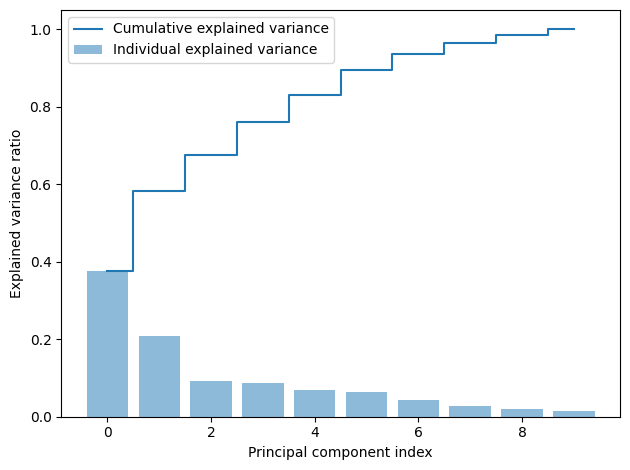

In [23]:
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

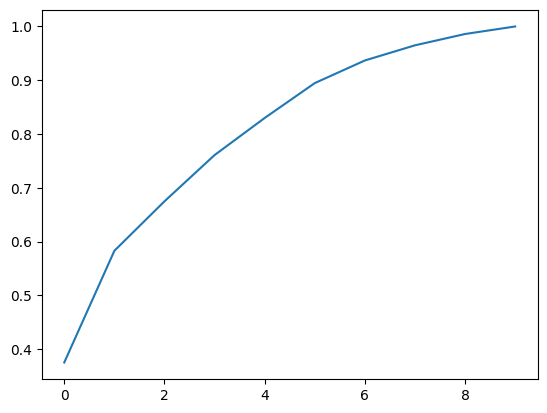

In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))